# Pytorch Workflow
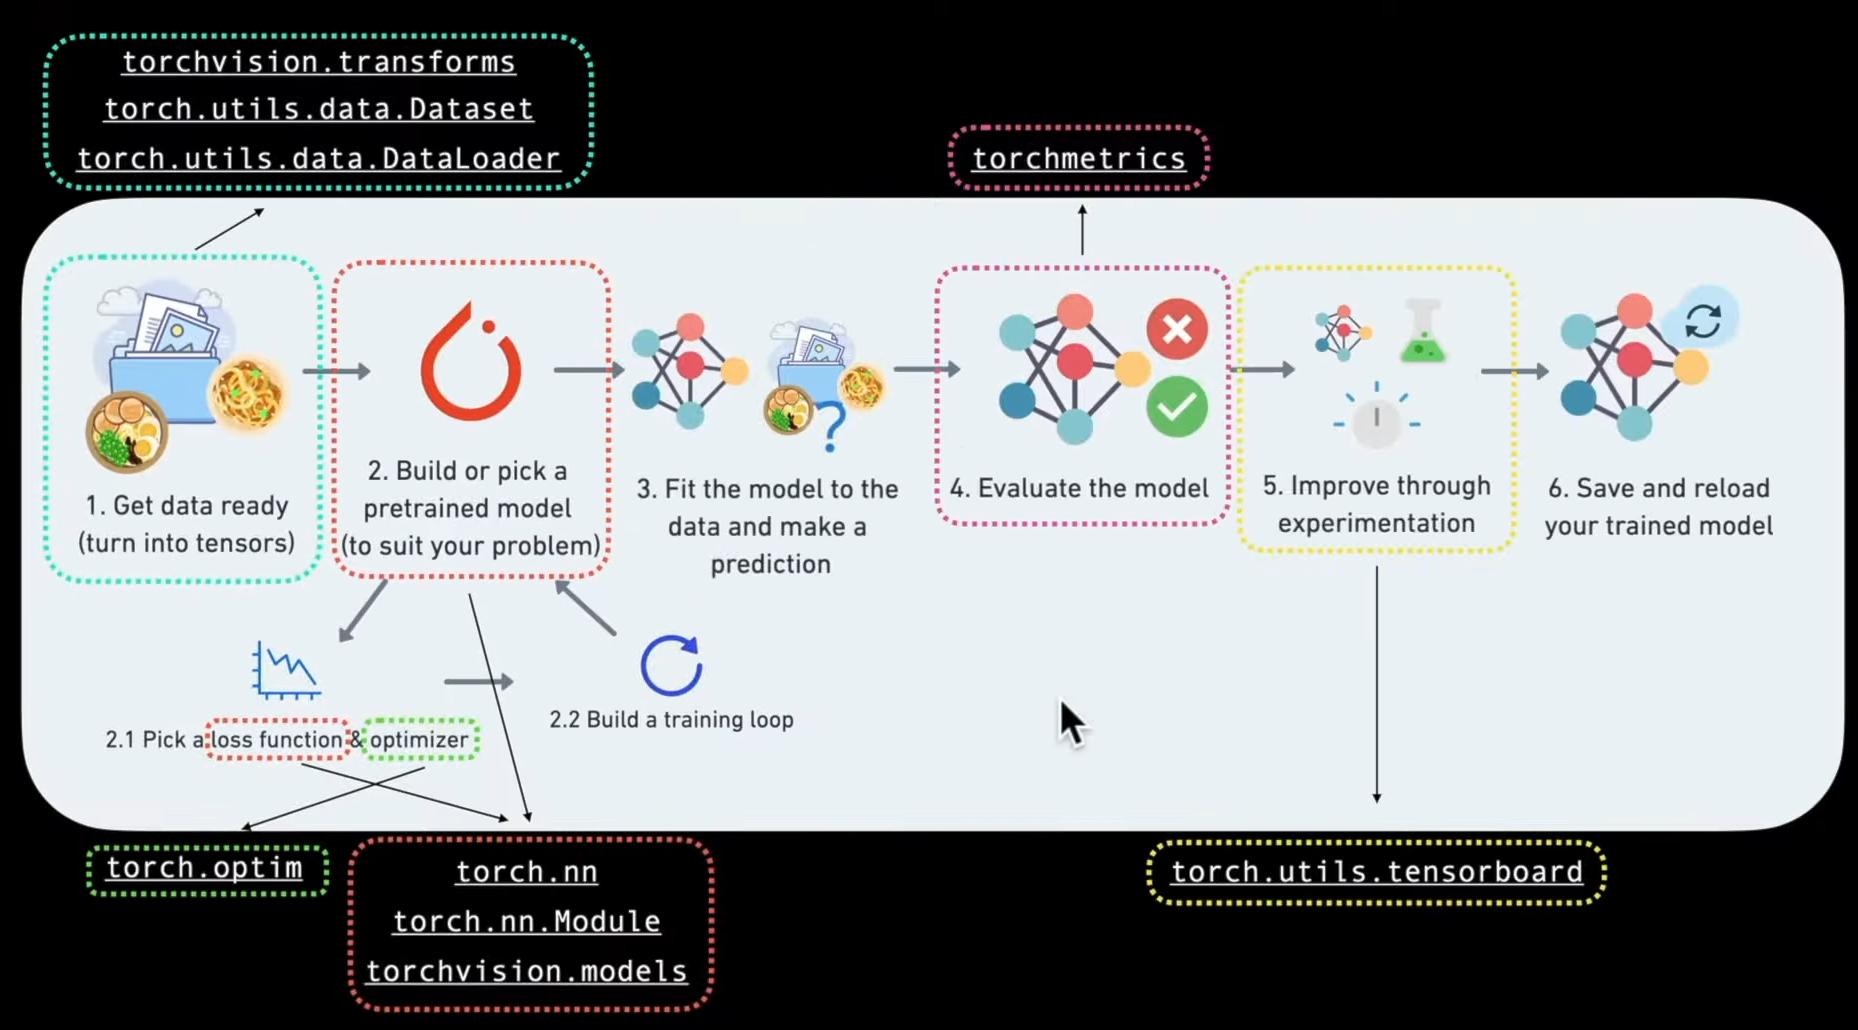

### Using linear regression formula to make straight line with knwon parameters.

In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn
import numpy as np

In [2]:
#create known parameters
weight=0.7
bias=0.3 

#create
start=0
end=1
step=0.02

X=torch.arange(start,end,step).unsqueeze(dim=1)

y=weight*X+bias #similart yo Y=mX+ c or Y= a +bX

### Splitting data into training and test sets

In [3]:
#Create a train/test split

train_split= int(0.8* len(X))
X_train, y_train =   X[:train_split],y[:train_split]
X_test, y_test   =   X[train_split:], y[train_split:]

### Visualizing our data

In [4]:
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10,10))
    
    #plot training data in blue
    plt.scatter(train_data,train_labels,c='y',s=4 ,label="Training Data")
    
    #plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4 , label='Test Data')
    
    #Are there predictions?
    if predictions is not None:
        plt.scatter(test_data,predictions, c='r',s=4 , label='Predictions')

    #show legend
    plt.legend(prop={"size":14});

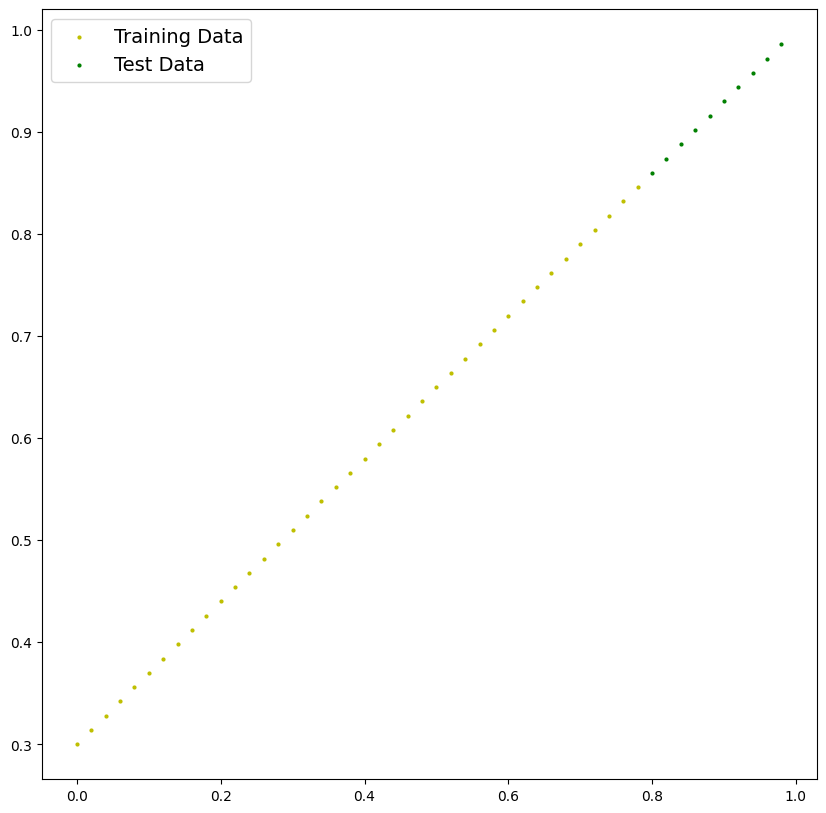

In [5]:
plot_predictions(X_train,y_train,X_test,y_test,predictions=None)

## Building Model
https://realpython.com/python-classes/

```python
class Student:
    def __init__(self, name, roll_no):
        self.name = name
        self.roll_no = roll_no
        print(f"I am {self.name} and my roll number is {self.roll_no}")      
        
class ExchangeStudent(Student):
    def __init__(self, name, roll_no, country):
        super().__init__(name, roll_no)
        self.country = country


In [6]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))
        self.bias=nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))
        
        
        #Forward method to define the computation in model
    def forward(self, x:torch.Tensor) -> torch.Tensor: #x should be of type tensor and this function will return tensor type
            return self.weights*x + self.bias
        
        

### Checking the contents of PyTorch model

In [7]:
torch.manual_seed(42)

model=LinearRegressionModel()

list(model.parameters())
model.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

### Making the prediction using `torch.inference_mode()`

In [8]:
with torch.inference_mode():
    y_preds=model(X_test) #this will invoke model.__call__(X_test) and __call__ will invoce forward() method
    
#with torch.no_grad():
   # y_pred=model(X_test)

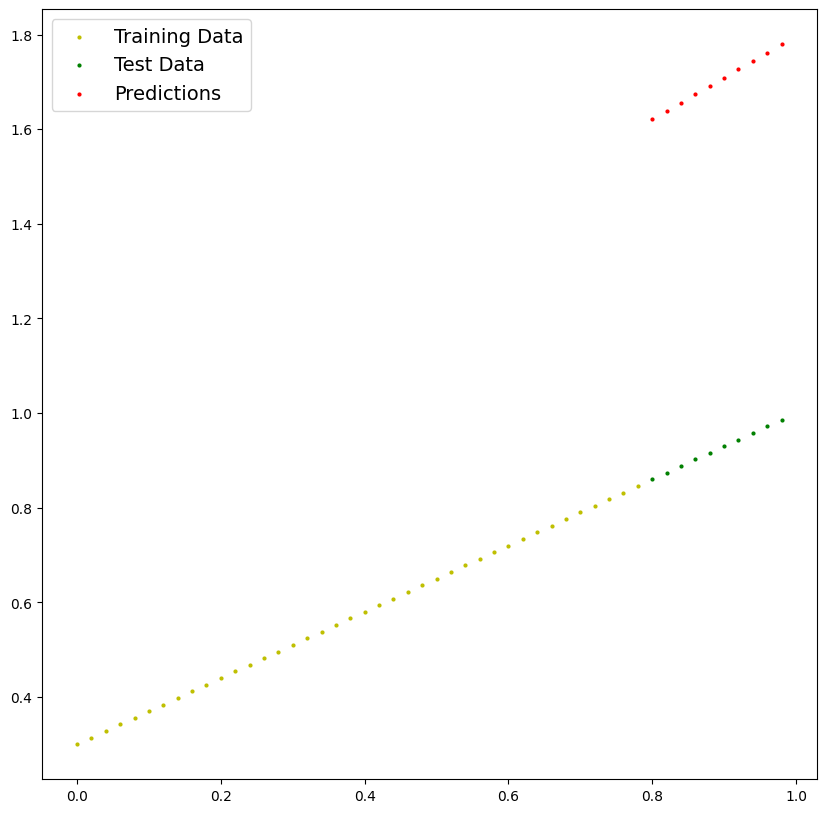

In [9]:
plot_predictions(predictions=y_preds)

## Train the model


In [10]:
#Setup a loss funciton
loss_fn=nn.L1Loss()

#Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01)

In [11]:
# building a training loop
epochs=200

#tracking different values
epoch_count=[]
loss_values=[]
test_loss_values=[]

for epoch in range(epochs):
    model.train()
    
    #forward pass
    y_pred=model(X_train)
    
    #calcualte the loss
    loss=loss_fn(y_pred,y_train)

    #optimizer zero grad
    optimizer.zero_grad()
    
    # perform back propagation on the loss with respect to param of the model
    loss.backward()
    
    # step the optimizer (perform gradient descent)
    optimizer.step()
    
    #testing
    model.eval()
    with torch.inference_mode():
        #do forward pass
        test_pred=model(X_test)
        
        #calculate the loss
        test_loss=loss_fn(test_pred,y_test)
        
    if epoch%10==0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch:{epoch} | Loss:{loss} | Test loss:{test_loss}")
        
    


      

Epoch:0 | Loss:0.6860889196395874 | Test loss:0.7637526988983154
Epoch:10 | Loss:0.5708791017532349 | Test loss:0.6290428042411804
Epoch:20 | Loss:0.45566922426223755 | Test loss:0.4943329691886902
Epoch:30 | Loss:0.34045934677124023 | Test loss:0.35962313413619995
Epoch:40 | Loss:0.2252494841814041 | Test loss:0.2249133139848709
Epoch:50 | Loss:0.1100396141409874 | Test loss:0.09020347893238068
Epoch:60 | Loss:0.009724985808134079 | Test loss:0.020998019725084305
Epoch:70 | Loss:0.006216754671186209 | Test loss:0.014099234715104103
Epoch:80 | Loss:0.002788322512060404 | Test loss:0.005826681852340698
Epoch:90 | Loss:0.007095950655639172 | Test loss:0.00754010071977973
Epoch:100 | Loss:0.007095950655639172 | Test loss:0.00754010071977973
Epoch:110 | Loss:0.007095950655639172 | Test loss:0.00754010071977973
Epoch:120 | Loss:0.007095950655639172 | Test loss:0.00754010071977973
Epoch:130 | Loss:0.007095950655639172 | Test loss:0.00754010071977973
Epoch:140 | Loss:0.007095950655639172 | Te

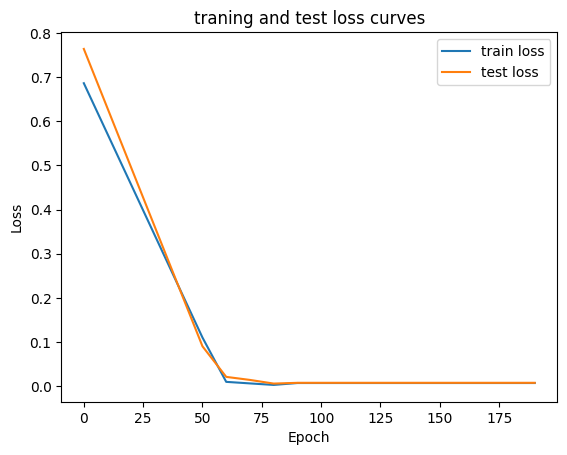

In [12]:
#plot the loss curves
plt.plot(epoch_count,np.array(torch.tensor(loss_values).cpu().numpy()),label="train loss")
plt.plot(epoch_count,np.array(torch.tensor(test_loss_values).cpu().numpy()), label='test loss')
plt.title("traning and test loss curves")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

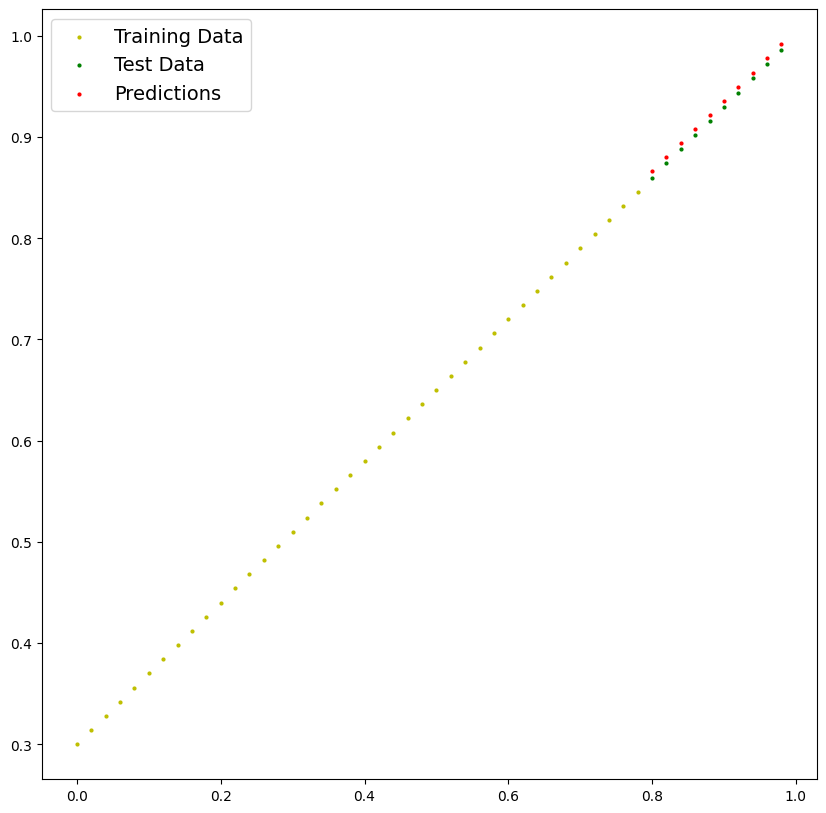

In [18]:
with torch.inference_mode():
    y_preds=model(X_test)

plot_predictions(predictions=y_preds)

### saving the model

In [13]:
from pathlib import Path

#create models directory
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#create model save path

MODEL_NAME='01_linear_regression.pth'
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

#save the model state_dict (recommended)

torch.save(obj=model.state_dict(),f=MODEL_SAVE_PATH)


### loading the saved model


In [14]:
loaded_model=LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

/tmp/ipykernel_30/943919118.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [15]:
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds=loaded_model(X_test)

In [19]:
with torch.inference_mode():
    ypredss=model(X_test)

In [20]:
ypredss==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])